In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from os.path import join, isfile
from os import path, scandir, listdir

from source.aggregated_stats import process_details, full_stats
import source.explore as exp

pd.set_option("max_columns", 300)

In [2]:
def list_all_files(location='../input/', pattern=None, recursive=True):
    """
    This function returns a list of files at a given location (including subfolders)
    
    - location: path to the directory to be searched
    - pattern: part of the file name to be searched (ex. pattern='.csv' would return all the csv files)
    - recursive: boolean, if True the function calls itself for every subdirectory it finds
    """
    subdirectories= [f.path for f in scandir(location) if f.is_dir()]
    files = [join(location, f) for f in listdir(location) if isfile(join(location, f))]
    if recursive:
        for directory in subdirectories:
            files.extend(list_all_files(directory))
    if pattern:
        files = [f for f in files if pattern in f]
    return files

In [3]:
women_comp = list_all_files('data/raw_women/')

In [4]:
women_comp

['data/raw_women/WEvents2015.csv',
 'data/raw_women/WEvents2020.csv',
 'data/raw_women/WEvents2017.csv',
 'data/raw_women/WEvents2018.csv',
 'data/raw_women/WSampleSubmissionStage1_2020.csv',
 'data/raw_women/WEvents2016.csv',
 'data/raw_women/WEvents2019.csv',
 'data/raw_women/WPlayers.csv',
 'data/raw_women/WDataFiles_Stage2/WRegularSeasonCompactResults.csv',
 'data/raw_women/WDataFiles_Stage2/Conferences.csv',
 'data/raw_women/WDataFiles_Stage2/Cities.csv',
 'data/raw_women/WDataFiles_Stage2/WTeamSpellings.csv',
 'data/raw_women/WDataFiles_Stage2/WSeasons.csv',
 'data/raw_women/WDataFiles_Stage2/WGameCities.csv',
 'data/raw_women/WDataFiles_Stage2/WNCAATourneyDetailedResults.csv',
 'data/raw_women/WDataFiles_Stage2/WTeams.csv',
 'data/raw_women/WDataFiles_Stage2/WNCAATourneySeeds.csv',
 'data/raw_women/WDataFiles_Stage2/WRegularSeasonDetailedResults.csv',
 'data/raw_women/WDataFiles_Stage2/WNCAATourneySlots.csv',
 'data/raw_women/WDataFiles_Stage2/WNCAATourneyCompactResults.csv',
 '

# submission file

In [5]:
[col for col in women_comp if 'Submission' in col]

['data/raw_women/WSampleSubmissionStage1_2020.csv']

In [6]:
df = pd.read_csv('data/raw_women/WSampleSubmissionStage1_2020.csv')
df[['year', 'Team_1', 'Team_2']] = pd.DataFrame(df['ID'].str.split('_').values.tolist(), index=df.index)
df['year'] = pd.to_numeric(df.year)
df.head()

ID  Pred  year Team_1 Team_2
0  2015_3106_3107   0.5  2015   3106   3107
1  2015_3106_3110   0.5  2015   3106   3110
2  2015_3106_3113   0.5  2015   3106   3113
3  2015_3106_3114   0.5  2015   3106   3114
4  2015_3106_3116   0.5  2015   3106   3116

In [7]:
df.year.value_counts(dropna=False)

2015    2016
2019    2016
2018    2016
2017    2016
2016    2016
Name: year, dtype: int64

# Teams.csv

In [8]:
[file for file in women_comp if 'Teams.csv' in file]

['data/raw_women/WDataFiles_Stage2/WTeams.csv',
 'data/raw_women/WDataFiles_Stage1/WTeams.csv']

In [9]:
df = pd.read_csv('data/raw_women/WDataFiles_Stage2/WTeams.csv')
df.shape

(365, 2)

In [10]:
df.head()

TeamID     TeamName
0    3101  Abilene Chr
1    3102    Air Force
2    3103        Akron
3    3104      Alabama
4    3105  Alabama A&M

# Seasons.csv

In [11]:
[file for file in women_comp if 'Seasons.csv' in file]

['data/raw_women/WDataFiles_Stage2/WSeasons.csv',
 'data/raw_women/WDataFiles_Stage1/WSeasons.csv']

In [12]:
df = pd.read_csv('data/raw_women/WDataFiles_Stage2/WSeasons.csv')
print(df.shape)
df.head()

(23, 6)


Season     DayZero RegionW  RegionX  RegionY  RegionZ
0    1998  10/27/1997    East  Midwest  Mideast     West
1    1999  10/26/1998    East  Mideast  Midwest     West
2    2000   11/1/1999    East  Midwest  Mideast     West
3    2001  10/30/2000    East  Midwest  Mideast     West
4    2002  10/29/2001    East     West  Mideast  Midwest

In [13]:
df.RegionW.value_counts()

East           7
Albany         3
Bridgeport     3
Dallas         2
DesMoines      1
NA1            1
Dayton         1
Lincoln        1
Greensboro     1
Chattanooga    1
Berkeley       1
Albuquerque    1
Name: RegionW, dtype: int64

In [14]:
df.RegionX.value_counts()

Spokane         4
Midwest         3
West            2
Mideast         2
Dallas          1
OklahomaCity    1
Fresno          1
Norfolk         1
Memphis         1
Chicago         1
Trenton         1
Cleveland       1
Dayton          1
Stanford        1
NA2             1
Tempe           1
Name: RegionX, dtype: int64

In [15]:
df.RegionY.value_counts()

Mideast         5
KansasCity      3
OklahomaCity    2
Midwest         2
Greensboro      2
Lexington       2
Louisville      1
Kingston        1
Fresno          1
NewOrleans      1
NA3             1
Dayton          1
Bridgeport      1
Name: RegionY, dtype: int64

In [16]:
df.RegionZ.value_counts()

West            5
Midwest         2
OklahomaCity    2
Philadelphia    2
Raleigh         2
Greensboro      1
NotreDame       1
Stockton        1
Portland        1
NA4             1
Spokane         1
Sacramento      1
San Antonio     1
SiouxFalls      1
Lexington       1
Name: RegionZ, dtype: int64

# Regular season compact results

In [17]:
[file for file in women_comp if 'RegularSeasonCompact' in file]

['data/raw_women/WDataFiles_Stage2/WRegularSeasonCompactResults.csv',
 'data/raw_women/WDataFiles_Stage1/WRegularSeasonCompactResults.csv']

In [18]:
df = pd.read_csv('data/raw_women/WDataFiles_Stage2/WRegularSeasonCompactResults.csv')
print(df.shape)
df.head()

(112183, 8)


Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
0    1998      18     3104      91     3202      41    H      0
1    1998      18     3163      87     3221      76    H      0
2    1998      18     3222      66     3261      59    H      0
3    1998      18     3307      69     3365      62    H      0
4    1998      18     3349     115     3411      35    H      0

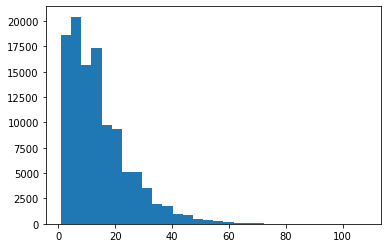

In [19]:
df['point_diff'] = df.WScore - df.LScore
df.point_diff.hist(bins=30)
plt.grid(False)

In [20]:
df.describe()

Season         DayNum        WTeamID         WScore  \
count  112183.000000  112183.000000  112183.000000  112183.000000   
mean     2009.482462      71.256269    3284.291738      71.833424   
std         6.526441      35.075262     103.802840      11.338365   
min      1998.000000       1.000000    3101.000000      30.000000   
25%      2004.000000      40.000000    3195.000000      64.000000   
50%      2010.000000      75.000000    3281.000000      71.000000   
75%      2015.000000     102.000000    3376.000000      79.000000   
max      2020.000000     132.000000    3467.000000     140.000000   

             LTeamID         LScore          NumOT     point_diff  
count  112183.000000  112183.000000  112183.000000  112183.000000  
mean     3284.287200      57.508428       0.037314      14.324996  
std       104.888911      10.796665       0.221659      10.876994  
min      3101.000000      11.000000       0.000000       1.000000  
25%      3193.000000      50.000000       0.000000       6.000000  
50%      3283.000000      57.000000       0.000000      12.000000  
75%      3375.000000      64.000000       0.000000      19.000000  
max      3467.000000     130.000000       5.000000     108.000000

In [21]:
summaries = df[['Season', 
    'WScore', 
    'LScore', 
    'NumOT', 
    'point_diff']].groupby('Season').agg(['min', 'max', 'mean', 'median'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

WScore_min  WScore_max  WScore_mean  WScore_median  LScore_min  \
Season                                                                   
1998            39         126    75.324457             75          27   
1999            38         130    74.747577             74          20   
2000            37         133    74.013339             73          25   
2001            36         135    74.269319             74          24   
2002            42         124    73.595371             73          23   
2003            37         128    72.299628             72          16   
2004            38         125    71.206491             71          18   
2005            37         118    69.858742             69          22   
2006            38         119    71.175834             71          22   
2007            34         117    71.132450             71          18   
2008            40         121    70.996062             70          22   
2009            36         126    69.819350             69          22   
2010            37         119    70.514786             70          18   
2011            30         126    70.658817             70          11   
2012            34         128    69.183809             68          14   
2013            33         128    68.843750             68          19   
2014            39         133    74.491051             74          23   
2015            36         123    71.308150             71          20   
2016            40         132    71.410635             70          20   
2017            38         140    72.100768             71          22   
2018            38         131    72.774237             72          21   
2019            35         124    72.303817             72          26   
2020            36         124    72.055502             71          22   

        LScore_max  LScore_mean  LScore_median  NumOT_min  NumOT_max  \
Season                                                                 
1998           101    60.342037             60          0          0   
1999           111    60.192390             60          0          0   
2000           104    59.191047             59          0          0   
2001           104    59.652263             59          0          0   
2002            99    58.876920             59          0          0   
2003           102    57.940906             58          0          0   
2004           119    57.316707             57          0          0   
2005            99    55.830534             56          0          4   
2006            95    57.262901             57          0          3   
2007           102    57.063416             57          0          5   
2008           101    56.806458             56          0          4   
2009            95    55.919603             56          0          3   
2010           112    56.473152             56          0          4   
2011           107    56.193071             56          0          4   
2012           105    55.117129             55          0          3   
2013           112    54.801890             54          0          4   
2014           130    60.300838             60          0          4   
2015           101    57.313135             57          0          4   
2016           108    57.040315             56          0          5   
2017           104    57.486756             57          0          4   
2018           109    57.954502             58          0          4   
2019           110    57.605916             57          0          3   
2020           107    57.686714             57          0          3   

        NumOT_mean  NumOT_median  point_diff_min  point_diff_max  \
Season                                                             
1998      0.000000             0               1              80   
1999      0.000000             0               1              97   
2000      0.000000             0               1              80   
2001      0.0000

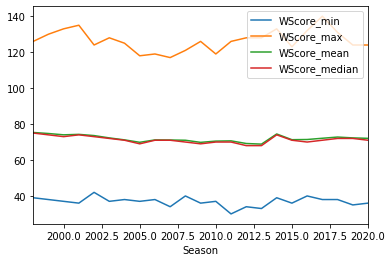

In [22]:
summaries[[col for col in summaries.columns if 'WScore' in col and 'sum' not in col]].plot()

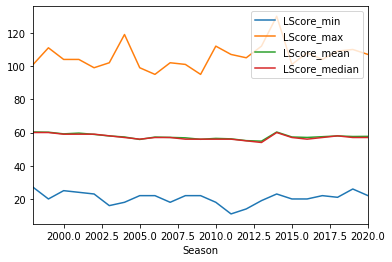

In [23]:
summaries[[col for col in summaries.columns if 'LScore' in col and 'sum' not in col]].plot()

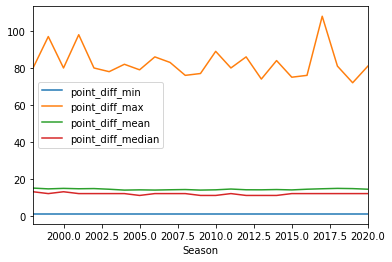

In [24]:
summaries[[col for col in summaries.columns if 'point_diff' in col and 'sum' not in col]].plot()

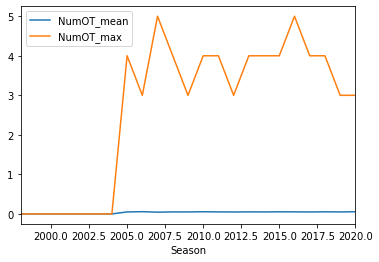

In [25]:
summaries[['NumOT_mean', 'NumOT_max']].plot()

In [26]:
summaries = df[['Season', 'WLoc',
    'WScore', 
    'LScore', 
    'NumOT', 
    'point_diff']].groupby(['Season', 'WLoc']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

WScore_min  WScore_max  WScore_mean  WScore_median  WScore_count  \
Season WLoc                                                                     
1998   A             44         125    73.769759             73          1455   
       H             39         126    76.261915             76          2413   
1999   A             45         116    73.192547             73          1610   
       H             38         130    75.706804             75          2616   
       N             61          86    73.600000             73             5   
...                 ...         ...          ...            ...           ...   
2019   H             35         124    73.243149             72          2883   
       N             45         113    72.297414             72           464   
2020   A             36         114    71.006129             70          1958   
       H             42         124    72.765211             72          2909   
       N             46         114    72.023026             71           304   

             LScore_min  LScore_max  LScore_mean  LScore_median  LScore_count  \
Season WLoc                                                                     
1998   A             27         101    61.104467           61.0          1455   
       H             27          95    59.882304           60.0          2413   
1999   A             29         111    60.837888           61.0          1610   
       H             20         101    59.784404           59.0          2616   
       N             52          79    65.800000           64.0             5   
...                 ...         ...          ...            ...           ...   
2019   H             26         110    56.987513           57.0          2883   
       N             29         107    58.900862           58.0           464   
2020   A             26         105    58.468846           58.0          1958   
       H             22         107    57.096941           57.0          2909   
       N             31          99    58.292763           58.0           304   

             NumOT_min  NumOT_max  NumOT_mean  NumOT_median  NumOT_count  \
Season WLoc                                                                
1998   A             0          0    0.000000             0         1455   
       H             0          0    0.000000             0         2413   
1999   A             0          0    0.000000             0         1610   
       H             0          0    0.000000             0         2616   
       N             0          0    0.000000             0            5   
...                ...        ...         ...           ...          ...   
2019   H             0          3    0.041970             0         2883   
       N             0          2    0.071121             0          464   
2020   A             0          3    0.062308             0         1958   
       H             0          3    0.052939             0         2909   
       N             0          1    0.026316             0          304   

             point_diff_min  point_diff_max  point_diff_mean  \
Season WLoc                                                    
1998   A                  1              79        12.665292   
       H                  1              80        16.379610   
1999   A                  1              62        12.354658   
       H                  1              97        15.922401   
       N                  1              18         7.800000   
...                     ...             ...              ...   
2019   H                  1              72        16.255636   
       N                  1              51        13.396552   
2020   A                  1              73        12.537283   
       H                  1              81        15.668271   
       N                  1              53        13.730263   

             point_diff_median  point_diff_count  
Season WLoc                     

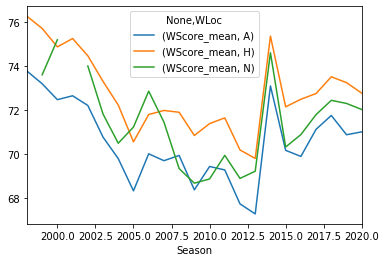

In [27]:
summaries[['WScore_mean']].unstack().plot()

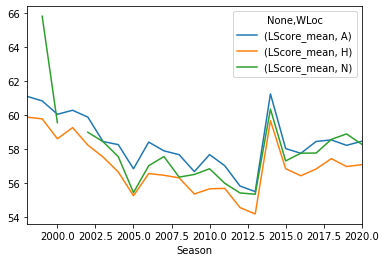

In [28]:
summaries[['LScore_mean']].unstack().plot()

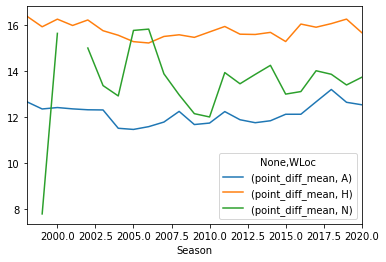

In [29]:
summaries[['point_diff_mean']].unstack().plot()

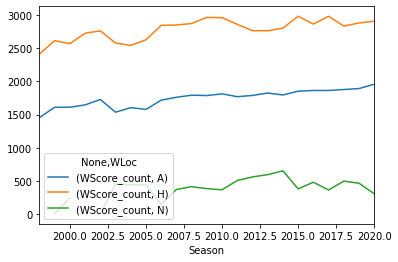

In [30]:
summaries[['WScore_count']].unstack().plot()

# Playoff compact results

In [31]:
[file for file in women_comp if 'NCAATourneyCompact' in file]

['data/raw_women/WDataFiles_Stage2/WNCAATourneyCompactResults.csv',
 'data/raw_women/WDataFiles_Stage1/WNCAATourneyCompactResults.csv']

In [32]:
df = pd.read_csv('data/raw_women/WDataFiles_Stage2/WNCAATourneyCompactResults.csv')
print(df.shape)
df.head()

(1386, 8)


Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
0    1998     137     3104      94     3422      46    H      0
1    1998     137     3112      75     3365      63    H      0
2    1998     137     3163      93     3193      52    H      0
3    1998     137     3198      59     3266      45    H      0
4    1998     137     3203      74     3208      72    A      0

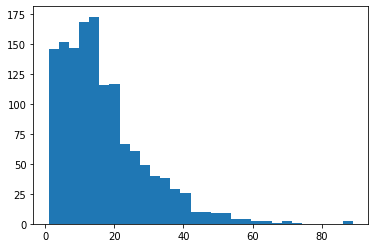

In [33]:
df['point_diff'] = df.WScore - df.LScore
df.point_diff.hist(bins=30)
plt.grid(False)

In [34]:
summaries = df[['Season', 
    'WScore', 
    'LScore', 
    'NumOT', 
    'point_diff']].groupby('Season').agg(['min', 'max', 'mean', 'median'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

WScore_min  WScore_max  WScore_mean  WScore_median  LScore_min  \
Season                                                                   
1998            55         102    78.587302             77          39   
1999            53         113    76.444444             76          41   
2000            57         116    78.031746             77          38   
2001            51         104    79.444444             79          29   
2002            55          98    76.507937             76          35   
2003            50          95    72.507937             72          33   
2004            52         103    72.285714             71          42   
2005            58          97    73.126984             71          33   
2006            57         102    75.857143             75          27   
2007            49          98    71.888889             70          33   
2008            47          98    73.507937             75          32   
2009            56         104    73.936508             74          30   
2010            49          96    73.111111             73          33   
2011            53          99    73.873016             75          30   
2012            57          96    73.888889             73          26   
2013            53         105    74.476190             74          37   
2014            55         106    77.079365             76          36   
2015            51         111    76.841270             77          33   
2016            48         101    77.111111             75          31   
2017            55         119    79.984127             77          30   
2018            61         140    82.460317             83          35   
2019            55         110    78.428571             78          34   

        LScore_max  LScore_mean  LScore_median  NumOT_min  NumOT_max  \
Season                                                                 
1998            80    63.396825             64          0          0   
1999            92    60.650794             61          0          0   
2000            85    61.634921             63          0          0   
2001            87    61.365079             63          0          0   
2002            79    59.111111             60          0          0   
2003            85    57.015873             57          0          0   
2004            85    57.952381             58          0          0   
2005            79    56.126984             57          0          0   
2006            75    59.920635             61          0          1   
2007            82    54.730159             54          0          1   
2008            87    57.555556             57          0          1   
2009            82    56.619048             58          0          1   
2010            82    56.650794             57          0          1   
2011            86    58.349206             60          0          1   
2012            80    58.095238             59          0          1   
2013            90    58.047619             57          0          2   
2014           100    59.571429             60          0          1   
2015            94    61.682540             64          0          1   
2016            84    58.587302             58          0          0   
2017            85    60.746032             62          0          1   
2018            89    62.841270             63          0          1   
2019            87    61.920635             62          0          1   

        NumOT_mean  NumOT_median  point_diff_min  point_diff_max  \
Season                                                             
1998      0.000000             0               1              53   
1999      0.000000             0               2              59   
2000      0.000000             0               1              71   
2001      0.000000             0               2              72   
2002      0.000000             0               1              49   
2003      0.000000        

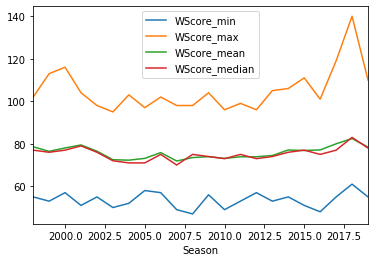

In [35]:
summaries[[col for col in summaries.columns if 'WScore' in col and 'sum' not in col]].plot()

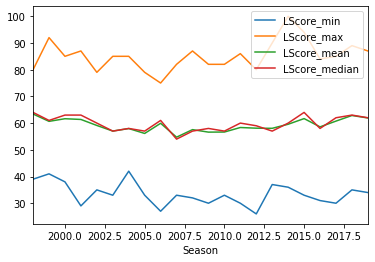

In [36]:
summaries[[col for col in summaries.columns if 'LScore' in col and 'sum' not in col]].plot()

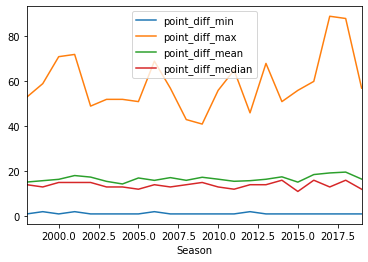

In [37]:
summaries[[col for col in summaries.columns if 'point_diff' in col and 'sum' not in col]].plot()

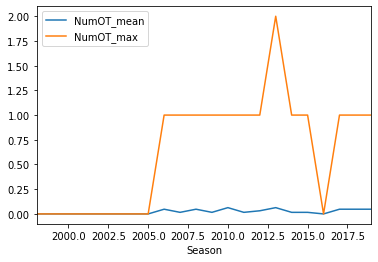

In [38]:
summaries[['NumOT_mean', 'NumOT_max']].plot()

In [39]:
df.WLoc.value_counts()

N    699
H    554
A    133
Name: WLoc, dtype: int64

# Detailed results

In [40]:
[col for col in women_comp if 'Detailed' in col]

['data/raw_women/WDataFiles_Stage2/WNCAATourneyDetailedResults.csv',
 'data/raw_women/WDataFiles_Stage2/WRegularSeasonDetailedResults.csv',
 'data/raw_women/WDataFiles_Stage1/WNCAATourneyDetailedResults.csv',
 'data/raw_women/WDataFiles_Stage1/WRegularSeasonDetailedResults.csv']

In [42]:
reg_season = pd.read_csv('data/raw_women/WDataFiles_Stage2/WRegularSeasonDetailedResults.csv')
print(df.shape)
stats = [col for col in reg_season.columns if 'W' in col and 'ID' not in col and 'Loc' not in col]

reg_season = process_details(reg_season)

reg_season.head()

(1386, 9)


Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  WFGA  \
0    2010      11     3103      63     3237      49    H      0    23    54   
1    2010      11     3104      73     3399      68    N      0    26    62   
2    2010      11     3110      71     3224      59    A      0    29    62   
3    2010      11     3111      63     3267      58    A      0    27    52   
4    2010      11     3119      74     3447      70    H      1    30    74   

   WFGM3  WFGA3  WFTM  WFTA  WOR  WDR  WAst  WTO  WStl  WBlk  WPF  LFGM  LFGA  \
0      5      9    12    19   10   26    14   18     7     0   15    20    54   
1      5     12    16    28   16   31    15   20     5     2   25    25    63   
2      6     15     7    12   14   23    18   13     6     2   17    19    58   
3      4     11     5     9    6   40    14   27     5    10   18    18    74   
4      7     20     7    11   14   33    18   11     5     3   18    25    74   

   LFGM3  LFGA3  LFTM  LFTA  LOR  LDR  LAst  LTO  LStl  LBlk  LPF  WOT_win  \
0      3     13     6    10   11   27    11   23     7     6   19        0   
1      4     21    14    27   14   26     7   20     4     2   27        0   
2      2     14    19    23   17   23     8   15     6     0   15        0   
3      6     26    16    25   22   22    15   11    14     5   14        0   
4      9     17    11    21   21   32    12   14     4     2   14        1   

   WAway  WFG_perc  WFGM2  WFGA2  WFG2_perc  WFG3_perc  WFT_perc  WTot_Reb  \
0      0  0.425926     18     45   0.400000   0.555556  0.631579        36   
1      1  0.419355     21     50   0.420000   0.416667  0.571429        47   
2      1  0.467742     23     47   0.489362   0.400000  0.583333        37   
3      1  0.519231     23     41   0.560976   0.363636  0.555556        46   
4      0  0.405405     23     54   0.425926   0.350000  0.636364        47   

   WFGM_no_ast  WFGM_no_ast_perc  Wpossessions  Woff_rating  \
0            9          0.391304        71.025    88.701162   
1           11          0.423077        79.300    92.055485   
2           11          0.379310        66.700   106.446777   
3           13          0.481481        77.275    81.527014   
4           12          0.400000        76.225    97.081010   

   Wshtg_opportunity  WTO_perposs  WTrue_shooting_perc  LFG_perc  LFGM2  \
0           0.887364     0.253432             0.499802  0.370370     17   
1           0.949559     0.252207             0.484728  0.396825     21   
2           1.014993     0.194903             0.524372  0.327586     17   
3           0.728243     0.349401             0.559751  0.243243     12   
4           1.039357     0.144310             0.467024  0.337838     16   

   LFGA2  LFG2_perc  LFG3_perc  LFT_perc  LTot_Reb  LFGM_no_ast  \
0     41   0.414634   0.230769  0.600000        38            9   
1     42   0.500000   0.190476  0.518519        40           18   
2     44   0.386364   0.142857  0.826087        40           11   
3     48   0.250000   0.230769  0.640000        44            3   
4     57   0.280702   0.529412  0.523810        53           13   

   LFGM_no_ast_perc  Lpossessions  Loff_rating  Lshtg_opportunity  \
0          0.450000        70.750    69.257951           0.830389   
1          0.720000        81.825    83.104186           0.926673   
2          0.578947        66.925    88.158386           1.029884   
3          0.166667        74.875    77.462437           1.146912   
4          0.520000        76.975    90.938616           1.090939   

   LTO_perposs  LTrue_shooting_perc  Wdef_rating  Ldef_rating  \
0     0.325088             0.417021    69.257951    88.701162   
1     0.244424             0.448401    83.104186    92.055485   
2     0.224131             0.428001    88.158386   106.446777   
3     0.146912             0.337700    77.462437    81.527014   
4     0.181877             0.416791    90.938616    97.081010   

   Wopp_shtg_opportunity  Lopp_shtg_opportunity  Wopp_possession

In [43]:
not_sum = ['WTeamID', 'DayNum', 'LTeamID']
to_sum = [col for col in reg_season.columns if col not in not_sum]

summaries = reg_season[to_sum].groupby(['Season', 'WLoc']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries.sample(5)

WScore_min  WScore_max  WScore_mean  WScore_median  WScore_count  \
Season WLoc                                                                     
2020   H             42         124    72.765211             72          2909   
2019   H             35         124    73.243149             72          2883   
2014   H             40         132    75.346609             75          2787   
2020   A             36         114    71.006129             70          1958   
2014   A             39         113    73.110117             73          1789   

             LScore_min  LScore_max  LScore_mean  LScore_median  LScore_count  \
Season WLoc                                                                     
2020   H             22         107    57.096941           57.0          2909   
2019   H             26         110    56.987513           57.0          2883   
2014   H             26         124    59.691424           59.0          2787   
2020   A             26         105    58.468846           58.0          1958   
2014   A             24         104    61.268306           61.0          1789   

             NumOT_min  NumOT_max  NumOT_mean  NumOT_median  NumOT_count  \
Season WLoc                                                                
2020   H             0          3    0.052939             0         2909   
2019   H             0          3    0.041970             0         2883   
2014   H             0          2    0.044133             0         2787   
2020   A             0          3    0.062308             0         1958   
2014   A             0          2    0.055897             0         1789   

             WFGM_min  WFGM_max  WFGM_mean  WFGM_median  WFGM_count  WFGA_min  \
Season WLoc                                                                     
2020   H           12        49  26.308697           26        2909        34   
2019   H           10        50  26.461672           26        2883        35   
2014   H           11        47  26.636527           26        2787        36   
2020   A           13        46  25.751788           25        1958        35   
2014   A           14        45  25.882616           26        1789        34   

             WFGA_max  WFGA_mean  WFGA_median  WFGA_count  WFGM3_min  \
Season WLoc                                                            
2020   H           99  59.934685           59        2909          0   
2019   H           92  59.711065           59        2883          0   
2014   H           98  60.055615           60        2787          0   
2020   A           88  59.077630           59        1958          0   
2014   A           92  58.552264           58        1789          0   

             WFGM3_max  WFGM3_mean  WFGM3_median  WFGM3_count  WFGA3_min  \
Season WLoc                                                                
2020   H            20    6.710897           6.0         2909          2   
2019   H            22    6.766909           6.0         2883          3   
2014   H            21    5.980624           6.0         2787          0   
2020   A            19    6.595506           6.0         1958          1   
2014   A            18    5.916154           6.0         1789          0   

             WFGA3_max  WFGA3_mean  WFGA3_median  WFGA3_count  WFTM_min  \
Season WLoc                                                               
2020   H            45   19.267446          19.0         2909         0   
2019   H            49   19.203954          19.0         2883         0   
2014   H            55   16.979189          16.0         2787         1   
2020   A            52   18.760981          18.0         1958         1   
2014   A            53   16.652879          16.0         1789         1   

             WFTM_max  WFTM_mean  WFTM_median  WFTM_count  WFTA_min  WFTA_max  \
Season WLoc                                                                     
2020   H           40  13.435889         13.0     

In [44]:
[c for c in summaries.columns if ('_perc_mean' in c or '_frac_mean' in c) and c.startswith('W')]

['WFG_perc_mean',
 'WFG2_perc_mean',
 'WFG3_perc_mean',
 'WFT_perc_mean',
 'WFGM_no_ast_perc_mean',
 'WTrue_shooting_perc_mean']

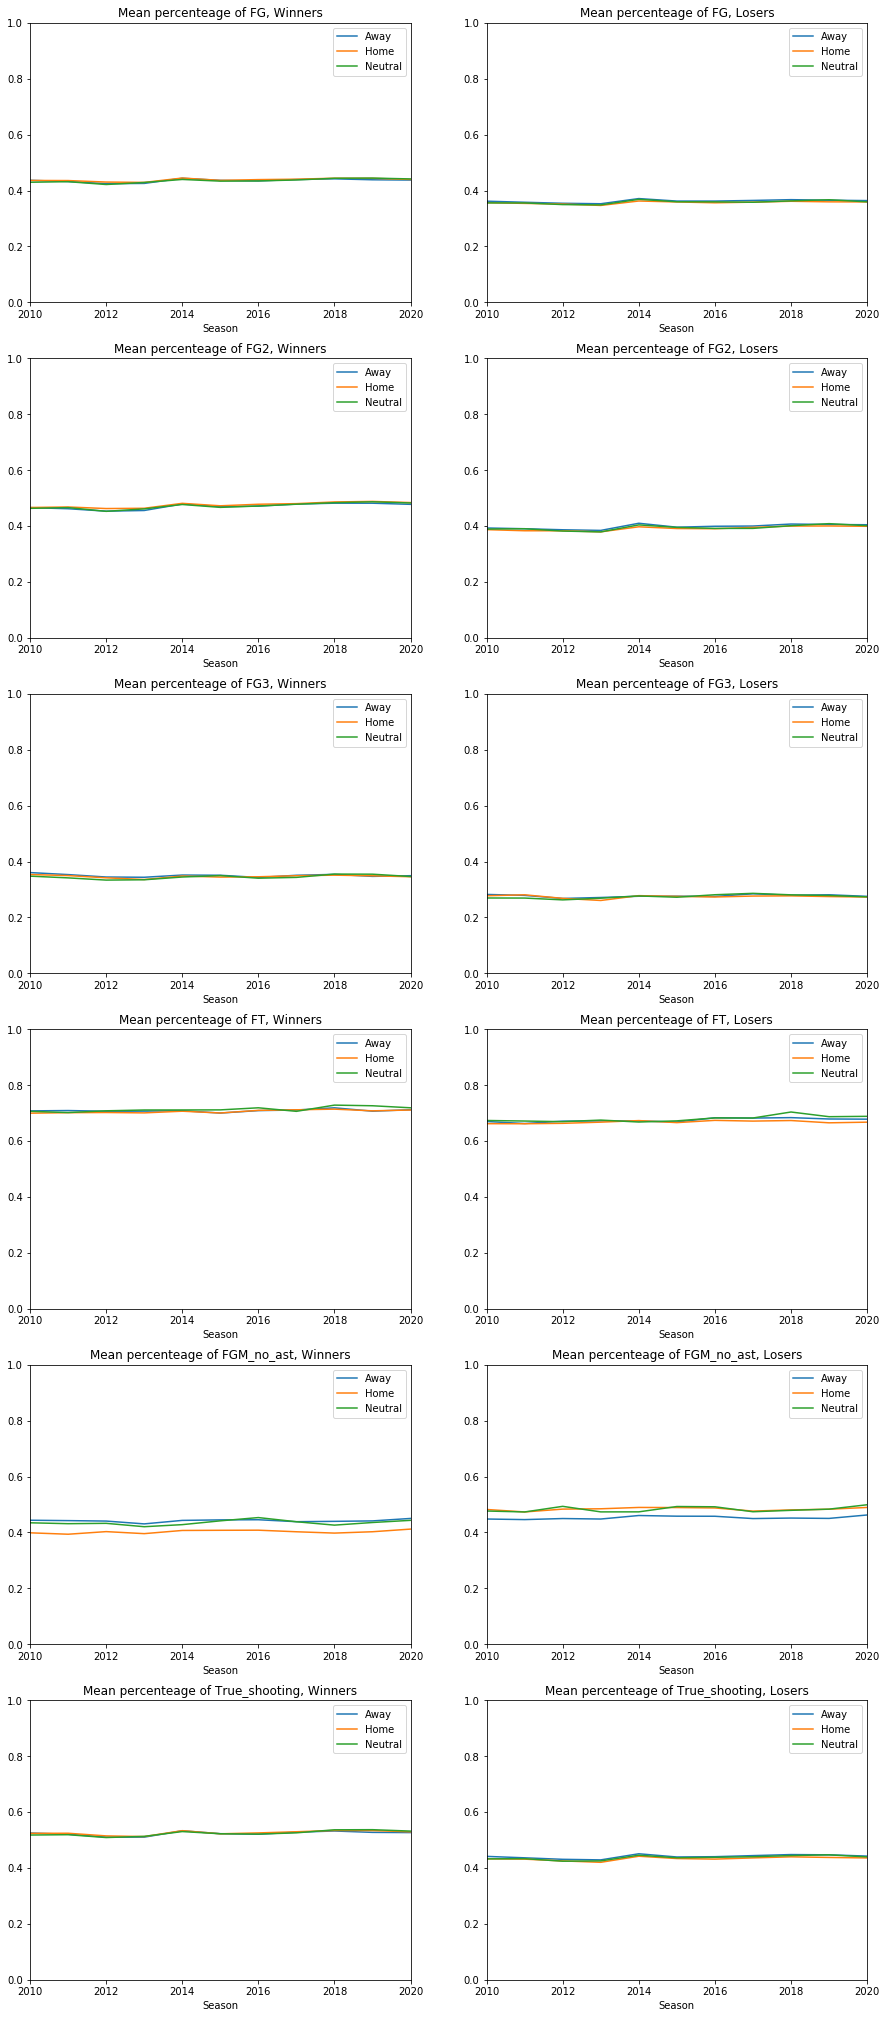

In [45]:
fig, ax= plt.subplots(6,2, figsize=(15, 6*6))

i = 0

for col in [c for c in summaries.columns if '_perc_mean' in c and c.startswith('W')]:
    name = col.split('_perc_')[0][1:]
    summaries[col].unstack().plot(title='Mean percenteage of '+name+', Winners',ax=ax[i][0])
    summaries['L'+name+'_perc_mean'].unstack().plot(title='Mean percenteage of '+name+', Losers',ax=ax[i][1])
    ax[i][0].legend(labels=['Away', 'Home', 'Neutral'])
    ax[i][1].legend(labels=['Away', 'Home', 'Neutral'])
    ax[i][0].set_ylim(0,1)
    ax[i][1].set_ylim(0,1)
    i += 1

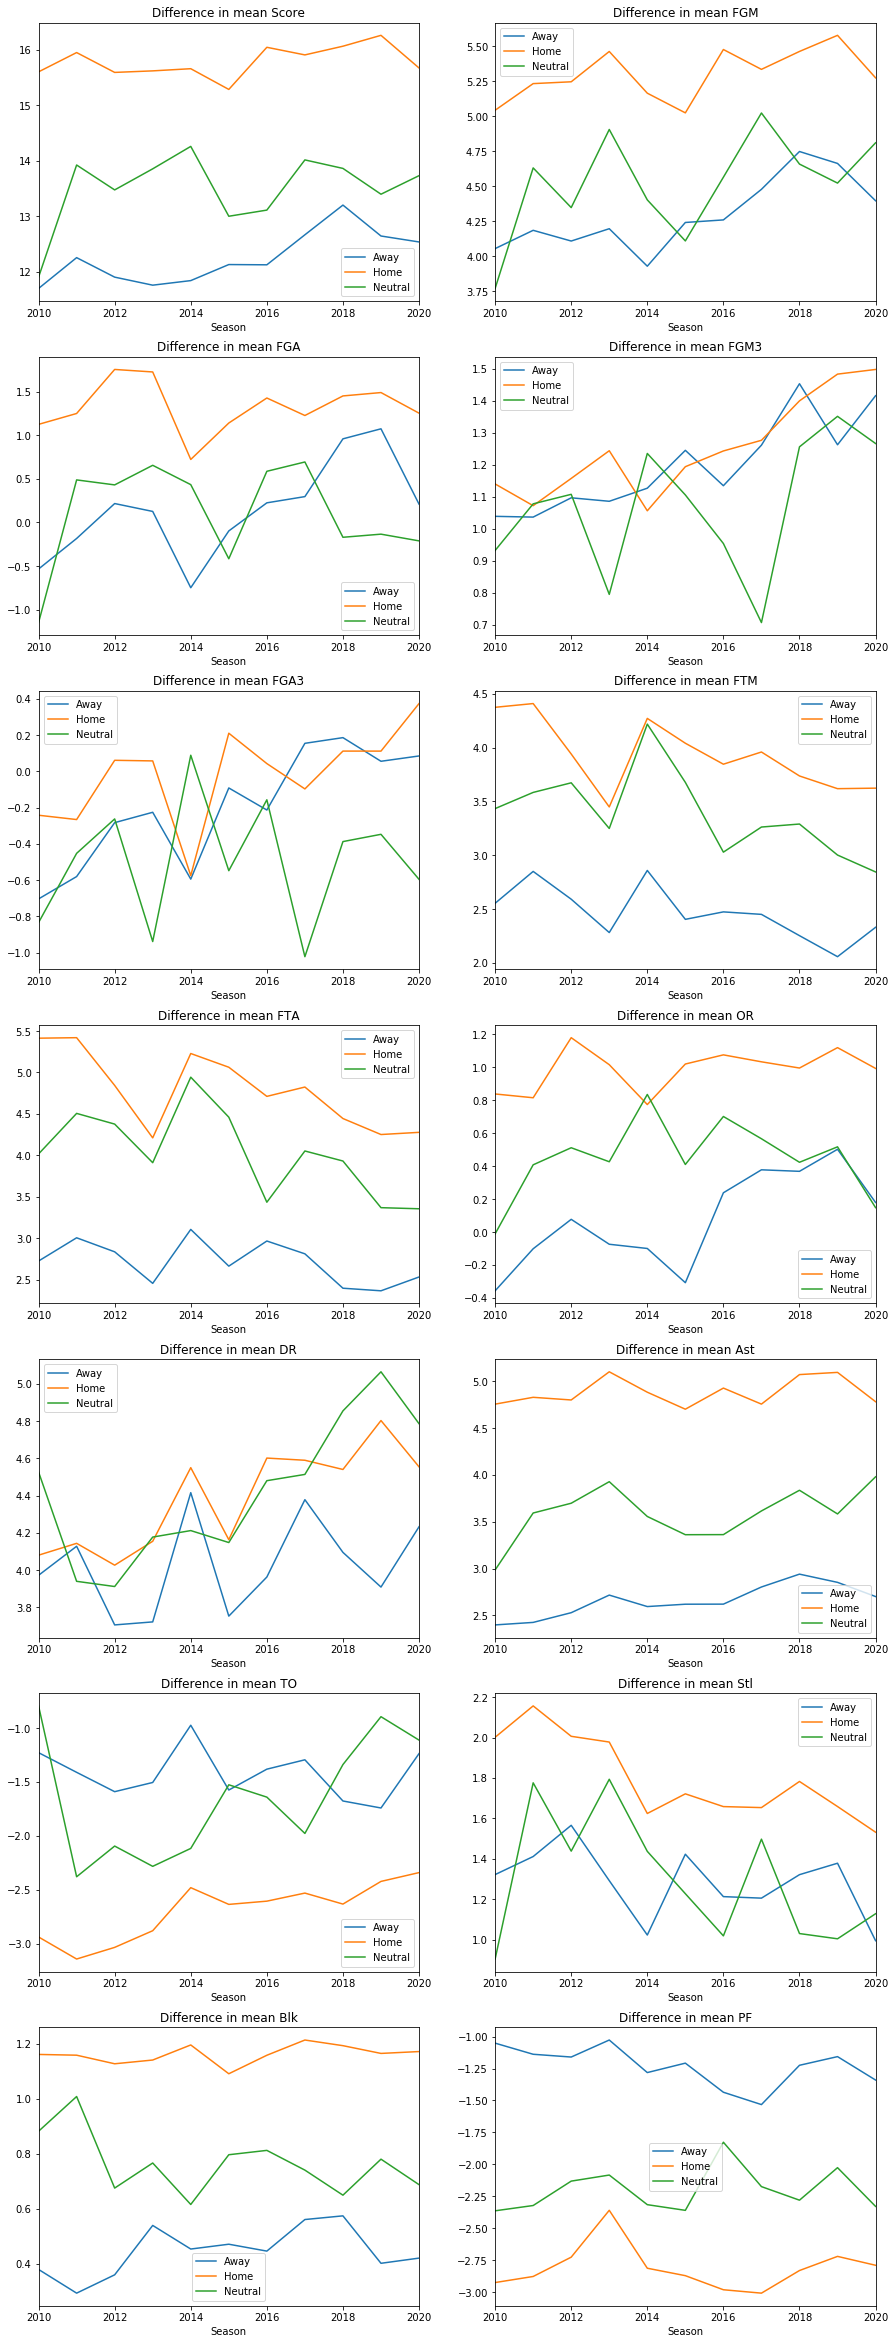

In [46]:
fig, ax= plt.subplots(7,2, figsize=(15, 6*7))

i, j = 0, 0

for col in stats:
    name = col[1:]
    summaries[[c for c in summaries.columns if name+'_diff_mean' in c]].unstack().plot(title='Difference in mean '+name,ax=ax[i][j])
    ax[i][j].legend(labels=['Away', 'Home', 'Neutral'])
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1

In [47]:
playoff = pd.read_csv('data/raw_women/WDataFiles_Stage2/WNCAATourneyDetailedResults.csv')

stats = [col for col in playoff.columns if 'W' in col and 'ID' not in col and 'Loc' not in col]

playoff= process_details(playoff)

playoff.head()

Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  WFGA  \
0    2010     138     3124      69     3201      55    N      0    28    57   
1    2010     138     3173      67     3395      66    N      0    23    59   
2    2010     138     3181      72     3214      37    H      0    26    57   
3    2010     138     3199      75     3256      61    H      0    25    63   
4    2010     138     3207      62     3265      42    N      0    24    68   

   WFGM3  WFGA3  WFTM  WFTA  WOR  WDR  WAst  WTO  WStl  WBlk  WPF  LFGM  LFGA  \
0      1      5    12    19   13   24    22   12     6     2   12    21    61   
1      9     26    12    19   13   34    13   16     3    10   14    22    73   
2      4     13    16    22   13   34    15   11    10     7   11    15    56   
3      3     15    22    26   20   27    13   17     8     3   21    21    62   
4      8     25     6     8   20   29    16    8     5     5   18    13    60   

   LFGM3  LFGA3  LFTM  LFTA  LOR  LDR  LAst  LTO  LStl  LBlk  LPF  WOT_win  \
0     10     34     3     5   17   19    12   18     4     1   18        0   
1      8     27    14    15   18   26     8    8     8     6   22        0   
2      4     15     3     8   10   21     4   16     6     4   20        0   
3      2     20    17    22   16   21    13   16     5     4   24        0   
4      5     26    11    17   16   22     9   10     3     4   12        0   

   WAway  WFG_perc  WFGM2  WFGA2  WFG2_perc  WFG3_perc  WFT_perc  WTot_Reb  \
0      1  0.491228     27     52   0.519231   0.200000  0.631579        37   
1      1  0.389831     14     33   0.424242   0.346154  0.631579        47   
2      0  0.456140     22     44   0.500000   0.307692  0.727273        47   
3      0  0.396825     22     48   0.458333   0.200000  0.846154        47   
4      1  0.352941     16     43   0.372093   0.320000  0.750000        49   

   WFGM_no_ast  WFGM_no_ast_perc  Wpossessions  Woff_rating  \
0            6          0.214286        65.025   106.113033   
1           10          0.434783        71.025    94.332981   
2           11          0.423077        65.450   110.007639   
3           12          0.480000        72.350   103.662751   
4            8          0.333333        59.800   103.678930   

   Wshtg_opportunity  WTO_perposs  WTrue_shooting_perc  LFG_perc  LFGM2  \
0           1.015379     0.184544             0.522529  0.344262     11   
1           0.957761     0.225273             0.492466  0.301370     14   
2           1.030558     0.168067             0.533729  0.267857     11   
3           1.041465     0.234969             0.497678  0.338710     19   
4           1.200669     0.133779             0.431755  0.216667      8   

   LFGA2  LFG2_perc  LFG3_perc  LFT_perc  LTot_Reb  LFGM_no_ast  \
0     27   0.407407   0.294118  0.600000        36            9   
1     46   0.304348   0.296296  0.933333        44           14   
2     41   0.268293   0.266667  0.375000        31           11   
3     42   0.452381   0.100000  0.772727        37            8   
4     34   0.235294   0.192308  0.647059        38            4   

   LFGM_no_ast_perc  Lpossessions  Loff_rating  Lshtg_opportunity  \
0          0.428571        64.375    85.436893           0.984466   
1          0.636364        70.125    94.117647           1.142602   
2          0.733333        65.800    56.231003           0.908815   
3          0.380952        72.450    84.195997           1.000000   
4          0.307692        62.075    67.660089           1.096657   

   LTO_perposs  LTrue_shooting_perc  Wdef_rating  Ldef_rating  \
0     0.279612             0.433925    85.436893   106.113033   
1     0.114082             0.411856    94.117647    94.332981   
2     0.243161             0.309365    56.231003   110.007639   
3     0.220842             0.420980    84.195997   103.662751   
4     0.161095             0.308483    67.660089   103.678930   

   Wopp_shtg_opportunity  Lopp_shtg_opportunity  Wopp_possession

In [48]:
not_sum = ['WTeamID', 'DayNum', 'LTeamID']
to_sum = [col for col in playoff.columns if col not in not_sum]

summaries = playoff[to_sum].groupby(['Season']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

WScore_min  WScore_max  WScore_mean  WScore_median  WScore_count  \
Season                                                                     
2010            49          96    73.111111             73            63   
2011            53          99    73.873016             75            63   
2012            57          96    73.888889             73            63   
2013            53         105    74.476190             74            63   
2014            55         106    77.079365             76            63   
2015            51         111    76.841270             77            63   
2016            48         101    77.111111             75            63   
2017            55         119    79.984127             77            63   
2018            61         140    82.460317             83            63   
2019            55         110    78.428571             78            63   

        LScore_min  LScore_max  LScore_mean  LScore_median  LScore_count  \
Season                                                                     
2010            33          82    56.650794             57            63   
2011            30          86    58.349206             60            63   
2012            26          80    58.095238             59            63   
2013            37          90    58.047619             57            63   
2014            36         100    59.571429             60            63   
2015            33          94    61.682540             64            63   
2016            31          84    58.587302             58            63   
2017            30          85    60.746032             62            63   
2018            35          89    62.841270             63            63   
2019            34          87    61.920635             62            63   

        NumOT_min  NumOT_max  NumOT_mean  NumOT_median  NumOT_count  WFGM_min  \
Season                                                                          
2010            0          1    0.063492             0           63        16   
2011            0          1    0.015873             0           63        17   
2012            0          1    0.031746             0           63        18   
2013            0          2    0.063492             0           63        19   
2014            0          1    0.015873             0           63        17   
2015            0          1    0.015873             0           63        19   
2016            0          0    0.000000             0           63        18   
2017            0          1    0.047619             0           63        20   
2018            0          1    0.047619             0           63        20   
2019            0          1    0.047619             0           63        17   

        WFGM_max  WFGM_mean  WFGM_median  WFGM_count  WFGA_min  WFGA_max  \
Season                                                                     
2010          41  26.507937           26          63        42        82   
2011          39  26.873016           27          63        40        77   
2012          42  26.761905           27          63        45        74   
2013          42  27.333333           27          63        44        79   
2014          44  27.873016           27          63        46        80   
2015          40  27.492063           28          63        43        73   
2016          37  28.158730           28          63        44        76   
2017          48  29.476190           28          63        41        82   
2018          59  30.079365           29          63        44        91   
2019          41  29.222222           29          63        50        80   

        WFGA_mean  WFGA_median  WFGA_count  WFGM3_min  WFGM3_max  WFGM3_mean  \
Season                                                                         
2010    59.126984           59          63          0         12    5.333333   
2011    58.666667           58          63          1   

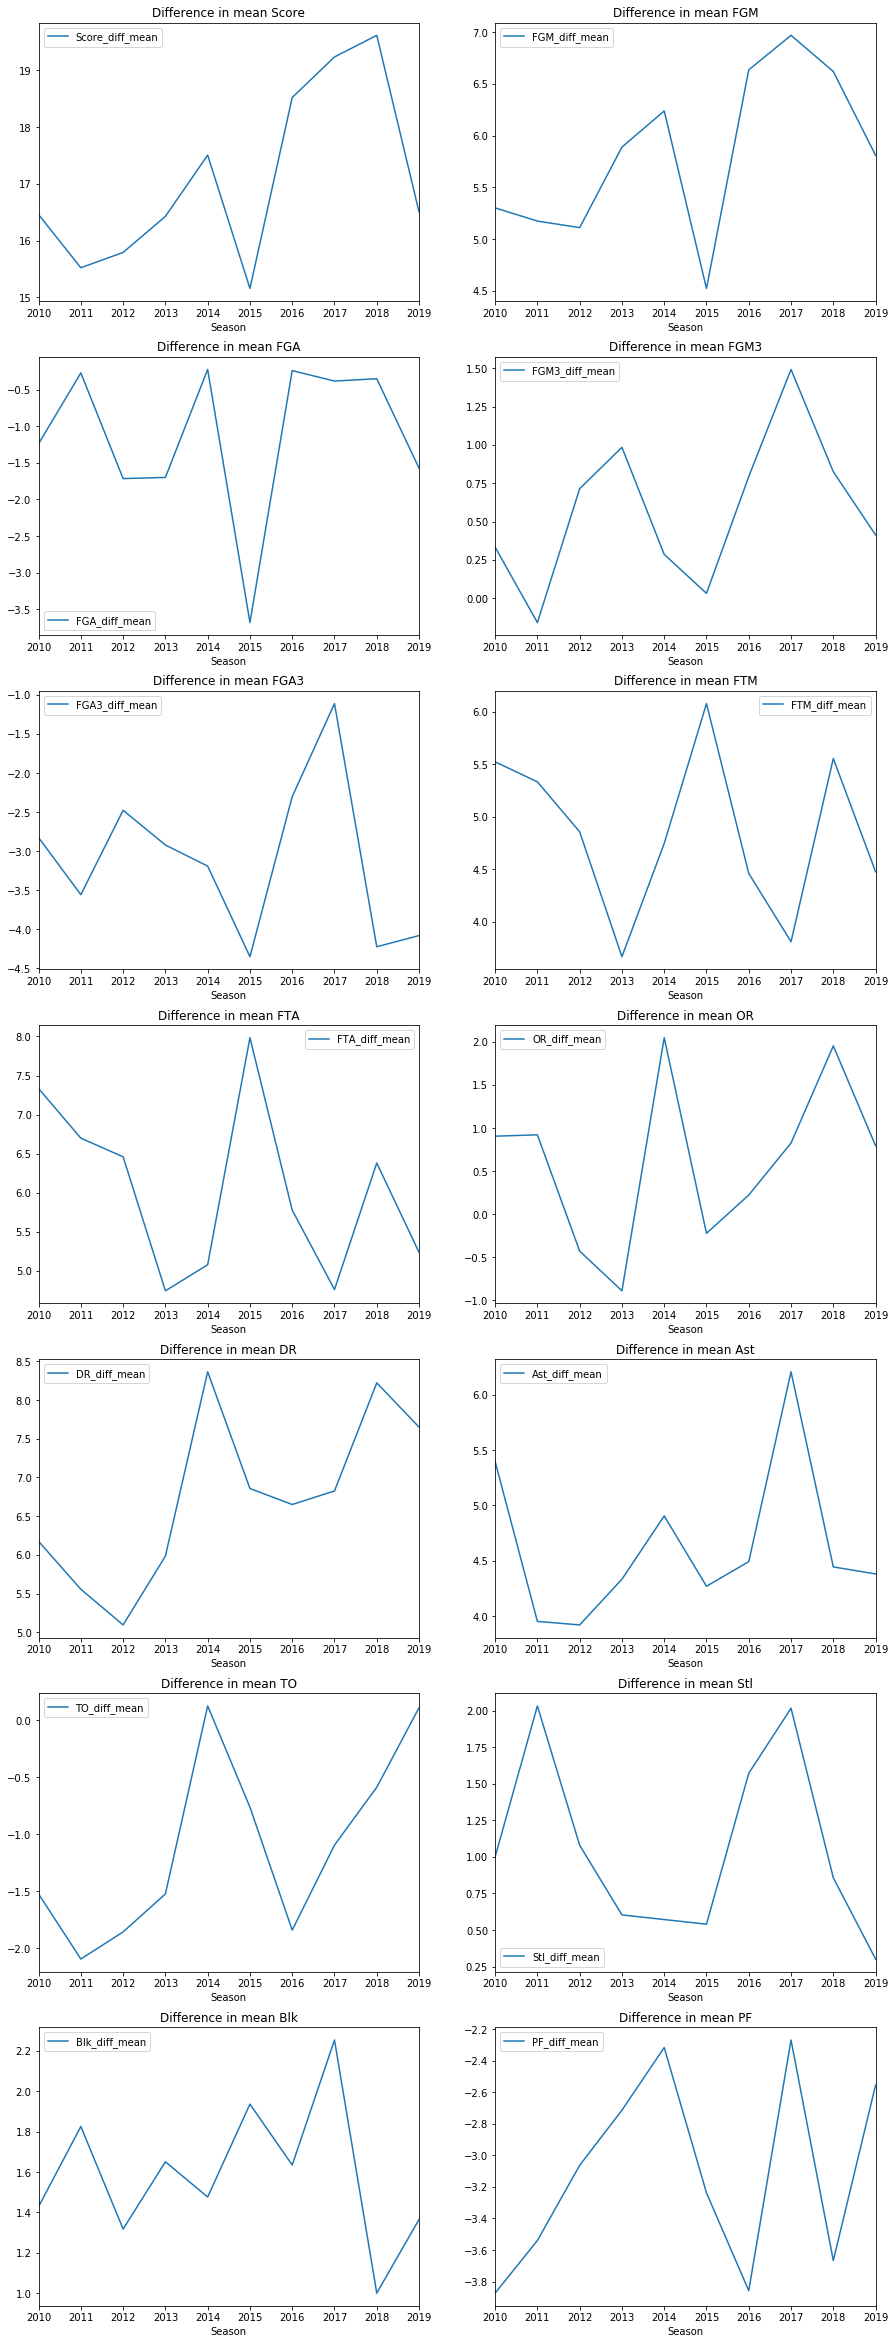

In [49]:
fig, ax= plt.subplots(7,2, figsize=(15, 6*7))

i, j = 0, 0

for col in stats:
    name = col[1:]
    summaries[[c for c in summaries.columns if name+'_diff_mean' in c]].plot(title='Difference in mean '+name,ax=ax[i][j])
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1

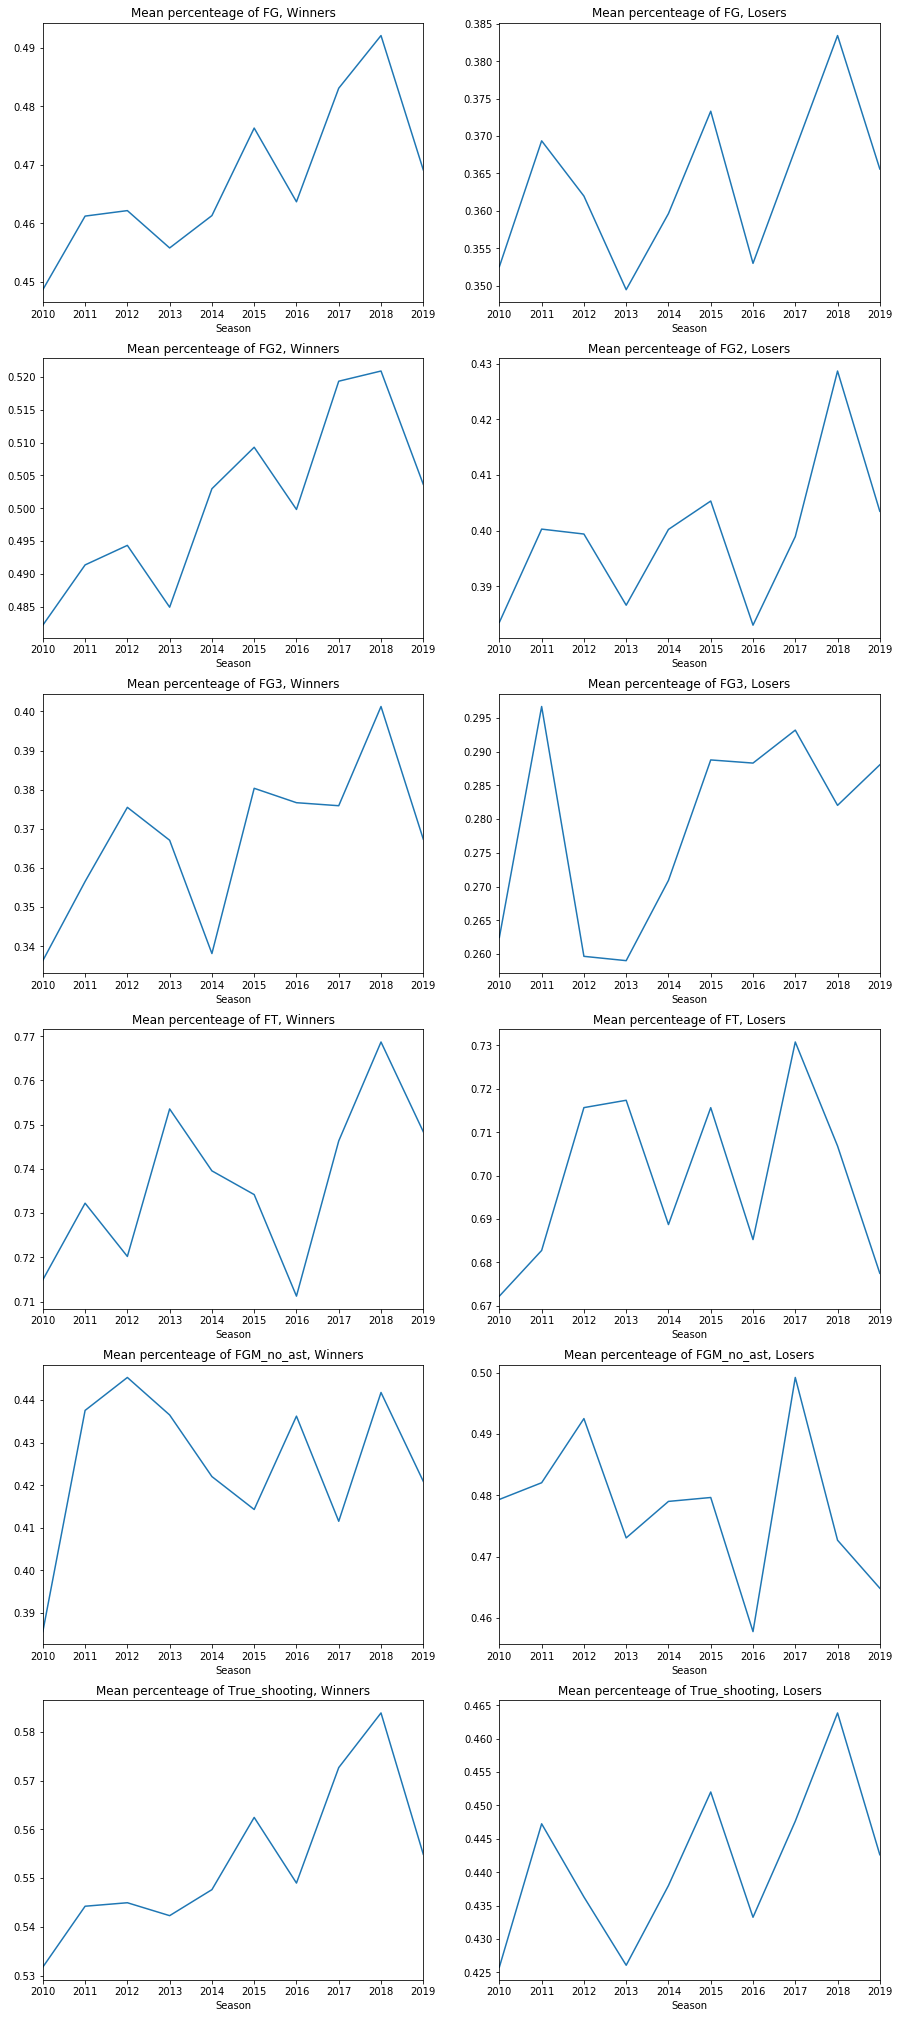

In [51]:
fig, ax= plt.subplots(6,2, figsize=(15, 6*6))

i = 0

for col in [c for c in summaries.columns if '_perc_mean' in c and c.startswith('W')]:
    name = col.split('_perc_')[0][1:]
    summaries[col].plot(title='Mean percenteage of '+name+', Winners',ax=ax[i][0])
    summaries['L'+name+'_perc_mean'].plot(title='Mean percenteage of '+name+', Losers',ax=ax[i][1])
    i += 1

# Seeds

In [52]:
[col for col in women_comp if 'Seed' in col]

['data/raw_women/WDataFiles_Stage2/WNCAATourneySeeds.csv',
 'data/raw_women/WDataFiles_Stage1/WNCAATourneySeeds.csv']

In [53]:
seeds = pd.read_csv('data/raw_women/WDataFiles_Stage2/WNCAATourneySeeds.csv')
seeds.head()

Season Seed  TeamID
0    1998  W01    3330
1    1998  W02    3163
2    1998  W03    3112
3    1998  W04    3301
4    1998  W05    3272

# Putting things together

In [54]:
reg_season.head()

Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  WFGA  \
0    2010      11     3103      63     3237      49    H      0    23    54   
1    2010      11     3104      73     3399      68    N      0    26    62   
2    2010      11     3110      71     3224      59    A      0    29    62   
3    2010      11     3111      63     3267      58    A      0    27    52   
4    2010      11     3119      74     3447      70    H      1    30    74   

   WFGM3  WFGA3  WFTM  WFTA  WOR  WDR  WAst  WTO  WStl  WBlk  WPF  LFGM  LFGA  \
0      5      9    12    19   10   26    14   18     7     0   15    20    54   
1      5     12    16    28   16   31    15   20     5     2   25    25    63   
2      6     15     7    12   14   23    18   13     6     2   17    19    58   
3      4     11     5     9    6   40    14   27     5    10   18    18    74   
4      7     20     7    11   14   33    18   11     5     3   18    25    74   

   LFGM3  LFGA3  LFTM  LFTA  LOR  LDR  LAst  LTO  LStl  LBlk  LPF  WOT_win  \
0      3     13     6    10   11   27    11   23     7     6   19        0   
1      4     21    14    27   14   26     7   20     4     2   27        0   
2      2     14    19    23   17   23     8   15     6     0   15        0   
3      6     26    16    25   22   22    15   11    14     5   14        0   
4      9     17    11    21   21   32    12   14     4     2   14        1   

   WAway  WFG_perc  WFGM2  WFGA2  WFG2_perc  WFG3_perc  WFT_perc  WTot_Reb  \
0      0  0.425926     18     45   0.400000   0.555556  0.631579        36   
1      1  0.419355     21     50   0.420000   0.416667  0.571429        47   
2      1  0.467742     23     47   0.489362   0.400000  0.583333        37   
3      1  0.519231     23     41   0.560976   0.363636  0.555556        46   
4      0  0.405405     23     54   0.425926   0.350000  0.636364        47   

   WFGM_no_ast  WFGM_no_ast_perc  Wpossessions  Woff_rating  \
0            9          0.391304        71.025    88.701162   
1           11          0.423077        79.300    92.055485   
2           11          0.379310        66.700   106.446777   
3           13          0.481481        77.275    81.527014   
4           12          0.400000        76.225    97.081010   

   Wshtg_opportunity  WTO_perposs  WTrue_shooting_perc  LFG_perc  LFGM2  \
0           0.887364     0.253432             0.499802  0.370370     17   
1           0.949559     0.252207             0.484728  0.396825     21   
2           1.014993     0.194903             0.524372  0.327586     17   
3           0.728243     0.349401             0.559751  0.243243     12   
4           1.039357     0.144310             0.467024  0.337838     16   

   LFGA2  LFG2_perc  LFG3_perc  LFT_perc  LTot_Reb  LFGM_no_ast  \
0     41   0.414634   0.230769  0.600000        38            9   
1     42   0.500000   0.190476  0.518519        40           18   
2     44   0.386364   0.142857  0.826087        40           11   
3     48   0.250000   0.230769  0.640000        44            3   
4     57   0.280702   0.529412  0.523810        53           13   

   LFGM_no_ast_perc  Lpossessions  Loff_rating  Lshtg_opportunity  \
0          0.450000        70.750    69.257951           0.830389   
1          0.720000        81.825    83.104186           0.926673   
2          0.578947        66.925    88.158386           1.029884   
3          0.166667        74.875    77.462437           1.146912   
4          0.520000        76.975    90.938616           1.090939   

   LTO_perposs  LTrue_shooting_perc  Wdef_rating  Ldef_rating  \
0     0.325088             0.417021    69.257951    88.701162   
1     0.244424             0.448401    83.104186    92.055485   
2     0.224131             0.428001    88.158386   106.446777   
3     0.146912             0.337700    77.462437    81.527014   
4     0.181877             0.416791    90.938616    97.081010   

   Wopp_shtg_opportunity  Lopp_shtg_opportunity  Wopp_possession

In [55]:
reg_s = full_stats(reg_season)
reg_s.head()

Season  TeamID        Ast  Ast_advantage  Ast_diff      Away       Blk  \
0    2010    3102  10.250000       0.035714 -9.285714  0.000000  0.642857   
1    2010    3103  13.433333       0.566667  1.733333  0.200000  2.400000   
2    2010    3104  13.103448       0.620690  0.586207  0.172414  2.931034   
3    2010    3105   9.740741       0.185185 -3.740741  0.259259  5.148148   
4    2010    3106  11.482759       0.655172  1.965517  0.172414  4.482759   

   Blk_advantage  Blk_diff         DR  DR_advantage   DR_diff  DR_opportunity  \
0       0.107143 -4.392857  19.535714      0.357143 -4.321429        0.673014   
1       0.200000 -1.400000  23.566667      0.600000  1.966667        0.696367   
2       0.413793 -0.655172  25.931034      0.448276 -0.551724        0.720761   
3       0.555556  0.740741  23.370370      0.629630  2.074074        0.682798   
4       0.551724  0.517241  24.758621      0.551724  1.344828        0.766965   

   DR_opportunity_advantage  DR_opportunity_diff        FGA       FGA2  \
0                  0.464286            -0.028518  53.142857  37.071429   
1                  0.633333             0.032045  55.266667  42.800000   
2                  0.413793             0.008338  62.103448  47.379310   
3                  0.481481            -0.028840  50.851852  40.962963   
4                  0.724138             0.080433  53.000000  43.413793   

   FGA2_advantage  FGA2_diff       FGA3  FGA3_advantage  FGA3_diff  \
0        0.607143   1.178571  16.071429        0.321429  -4.428571   
1        0.566667   3.000000  12.466667        0.300000  -2.700000   
2        0.689655   3.758621  14.724138        0.482759  -1.793103   
3        0.407407  -3.777778   9.888889        0.296296  -2.888889   
4        0.689655   4.551724   9.586207        0.448276  -2.241379   

   FGA_advantage  FGA_diff        FGM       FGM2  FGM2_advantage  FGM2_diff  \
0       0.428571 -3.250000  19.142857  14.571429        0.250000  -4.714286   
1       0.500000  0.300000  22.233333  18.300000        0.666667   2.166667   
2       0.586207  1.965517  24.724138  20.379310        0.586207   1.586207   
3       0.296296 -6.666667  20.370370  17.333333        0.481481  -1.703704   
4       0.586207  2.310345  18.448276  15.758621        0.689655   1.586207   

       FGM3  FGM3_advantage  FGM3_diff  FGM_advantage  FGM_diff  FGM_no_ast  \
0  4.571429        0.321429  -3.142857       0.178571 -7.857143    8.892857   
1  3.933333        0.333333  -0.900000       0.600000  1.266667    8.800000   
2  4.344828        0.517241  -0.758621       0.586207  0.827586   11.620690   
3  3.037037        0.407407  -0.703704       0.370370 -2.407407   10.629630   
4  2.689655        0.344828  -1.034483       0.517241  0.551724    6.965517   

   FGM_no_ast_advantage  FGM_no_ast_diff        FTA  FTA_advantage  FTA_diff  \
0              0.642857         1.428571  13.214286       0.464286 -1.678571   
1              0.433333        -0.466667  19.600000       0.500000  0.766667   
2              0.517241         0.241379  16.793103       0.344828 -5.172414   
3              0.592593         1.333333  24.333333       0.592593  0.814815   
4              0.310345        -1.413793  24.000000       0.344828 -2.655172   

         FTM  FTM_advantage  FTM_diff    N_wins         OR  OR_advantage  \
0   8.964286       0.428571 -1.107143  0.035714  12.464286      0.464286   
1  13.833333       0.633333  0.966667  0.566667  14.200000      0.433333   
2  10.344828       0.379310 -3.758621  0.379310  14.482759      0.586207   
3  17.000000       0.555556  1.555556  0.518519  13.666667      0.444444   
4  15.551724       0.413793 -2.344828  0.413793  15.000000      0.586207   

    OR_diff  OR_opportunity  OR_opportunity_advantage  OR_opportunity_diff  \
0 -0.357143        0.370681                  0.357143            -0.061659   
1  0.566667        0.424251                  0.600000             0.020809   
2 -0.379310        0.389014                  0.379310            

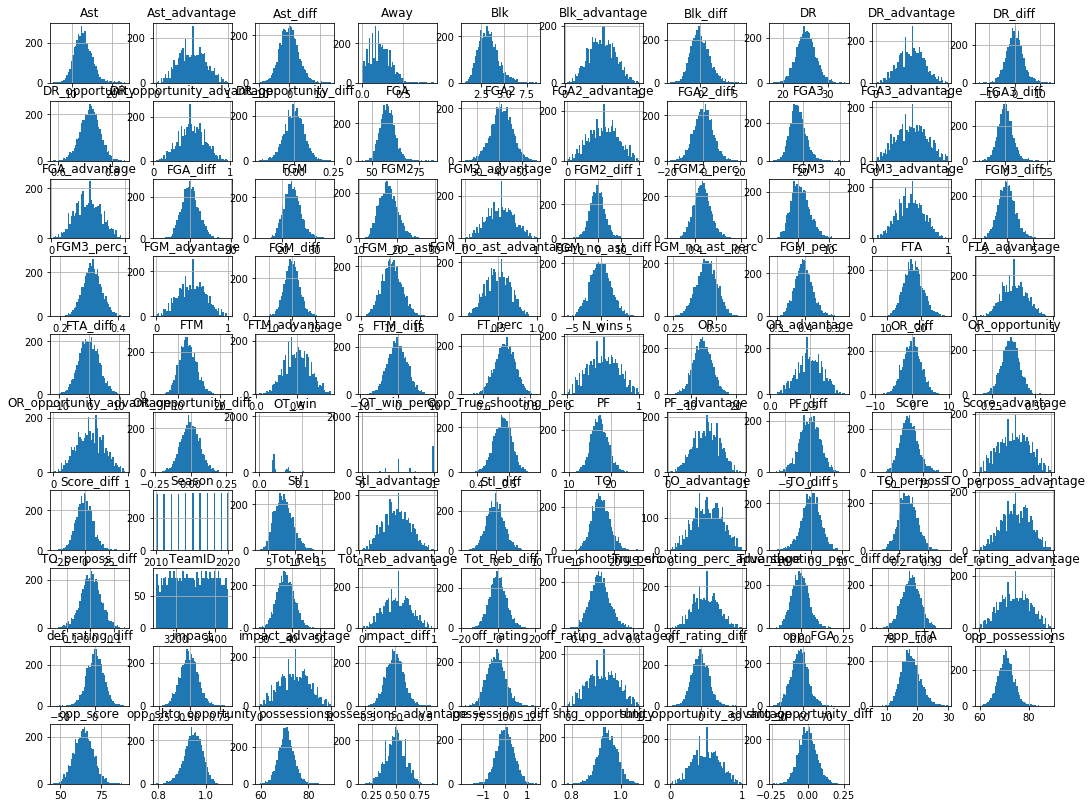

In [56]:
reg_s.hist(bins=50, figsize=(18, 14))
plt.show()

In [57]:
summary_reg = reg_s.groupby('Season')[[col for col in reg_s if col not in ['TeamID', 'Season']]].agg(['mean', 'max', 'min'])
summary_reg.columns = ['_'.join(col).strip() for col in summary_reg.columns.values]
summary_reg

Ast_mean    Ast_max   Ast_min  Ast_advantage_mean  Ast_advantage_max  \
Season                                                                          
2010    12.684878  19.468750  6.142857            0.495270           1.000000   
2011    12.761776  20.387097  7.580645            0.495840           0.969697   
2012    12.475294  19.258065  7.366667            0.496397           0.967742   
2013    12.621095  21.843750  5.466667            0.495964           0.933333   
2014    13.245258  21.558824  6.400000            0.496532           0.968750   
2015    12.819985  21.636364  6.714286            0.496480           1.000000   
2016    12.868026  21.625000  7.222222            0.496689           1.000000   
2017    13.127421  23.343750  7.379310            0.496196           1.000000   
2018    13.242014  22.625000  7.464286            0.495726           0.939394   
2019    13.111576  22.593750  8.250000            0.495869           0.937500   
2020    12.938021  22.133333  8.133333            0.497427           0.964286   

        Ast_advantage_min  Ast_diff_mean  Ast_diff_max  Ast_diff_min  \
Season                                                                 
2010             0.034483      -0.079888     10.718750     -9.285714   
2011             0.034483      -0.075875     10.484848     -9.750000   
2012             0.068966      -0.067266     10.303030     -8.629630   
2013             0.033333      -0.069604     10.750000     -9.862069   
2014             0.000000      -0.068645     12.294118     -9.884615   
2015             0.068966      -0.067311     13.090909     -7.703704   
2016             0.035714      -0.065693     11.656250     -9.892857   
2017             0.066667      -0.071951     13.000000     -8.666667   
2018             0.035714      -0.080188     12.281250     -9.964286   
2019             0.062500      -0.074074     13.187500     -8.928571   
2020             0.076923      -0.048688     13.600000     -7.800000   

        Away_mean  Away_max  Away_min  Blk_mean   Blk_max   Blk_min  \
Season                                                                
2010     0.207996  0.516129       0.0  3.251082  7.250000  0.642857   
2011     0.217993  0.656250       0.0  3.273225  7.121212  1.214286   
2012     0.225777  0.733333       0.0  3.359443  7.939394  0.931034   
2013     0.230616  0.774194       0.0  3.350808  7.931034  1.000000   
2014     0.230780  0.870968       0.0  3.144415  8.235294  0.793103   
2015     0.211054  0.633333       0.0  3.408806  8.090909  0.923077   
2016     0.222343  0.593750       0.0  3.369166  6.451613  1.120000   
2017     0.211359  0.515152       0.0  3.299786  8.000000  0.692308   
2018     0.224838  0.625000       0.0  3.336210  7.366667  1.000000   
2019     0.221435  0.575758       0.0  3.209667  7.125000  0.931034   
2020     0.217179  0.531250       0.0  3.224517  8.606061  0.965517   

        Blk_advantage_mean  Blk_advantage_max  Blk_advantage_min  \
Season                                                             
2010              0.498296           0.967742           0.071429   
2011              0.498248           0.969697           0.037037   
2012              0.499271           1.000000           0.071429   
2013              0.498534           0.965517           0.148148   
2014              0.498467           0.941176           0.068966   
2015              0.498552           0.969697           0.076923   
2016              0.498328           0.906250           0.033333   
2017              0.498809           0.931034           0.071429   
2018              0.498662           1.000000           0.096774   
2019              0.498813           0.906250           0.093750   
2020              0.498936           0.966667           0.071429   

        Blk_diff_mean  Blk_diff_max  Blk_diff_min    DR_mean     DR_max  \
Season                                                                    
2010        -0.021664      5.375000     -4.392857  24.53790

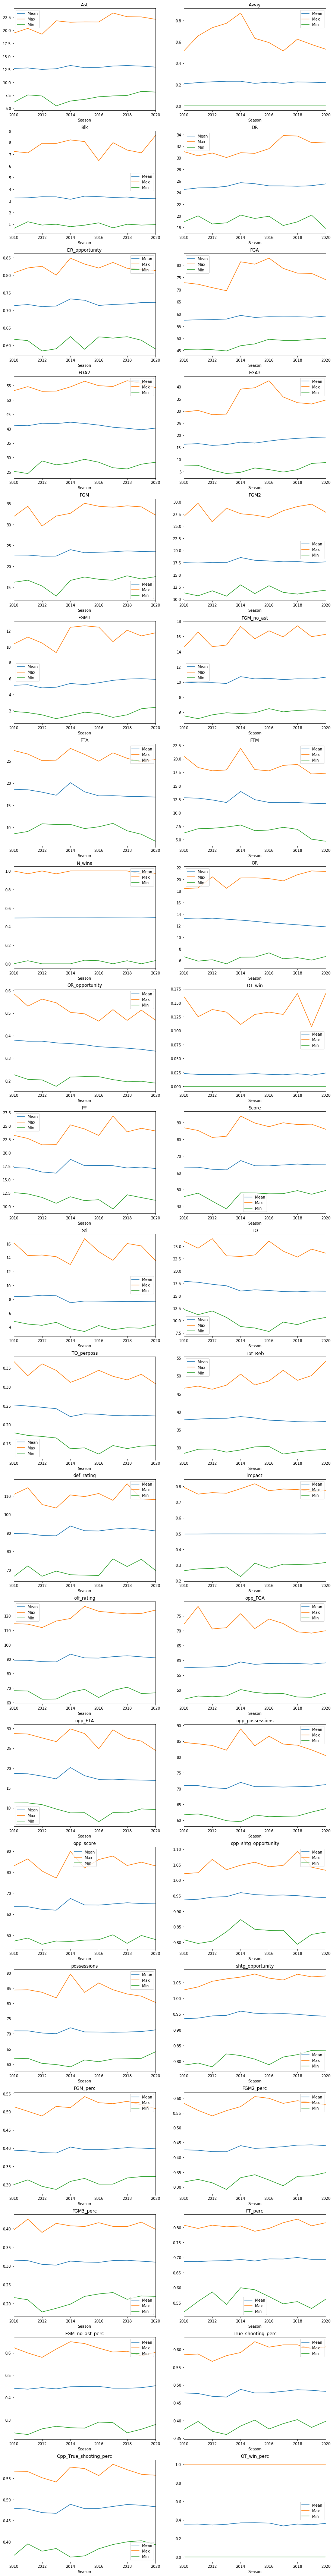

In [59]:
stats = [col.split('_mean')[0] for col in summary_reg if '_mean' in col and 'diff_' not in col and 'advantage' not in col]

fig, ax= plt.subplots(int(np.ceil(len(stats)/2)),2, figsize=(15, 6*int(np.ceil((len(stats)/2)))))

i, j = 0, 0

for col in stats:
    summary_reg[[col+'_mean', col+'_max', col+'_min']].plot(title=col,ax=ax[i][j])
    ax[i][j].legend(labels=['Mean', 'Max', 'Min'])
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1

plt.show()

# Exploring training data (from Notebook 3) 

In [60]:
df = pd.read_csv('data/processed_women/training_data.csv')

df = df[[col for col in df if 'L2W' not in col]].copy()

df.head()

Season  DayNum  Team1  Team2  target  target_points  T1_Loc  T2_Loc  \
0    2010     138   3124   3201       1             14       0       0   
1    2010     138   3173   3395       1              1       0       0   
2    2010     138   3181   3214       1             35       1      -1   
3    2010     138   3199   3256       1             14       1      -1   
4    2010     138   3207   3265       1             20       0       0   

               ID     T1_Ast  T1_Ast_advantage  T1_Ast_diff   T1_Away  \
0  2010_3124_3201  14.687500          0.781250     5.187500  0.250000   
1  2010_3173_3395  14.461538          0.615385     2.807692  0.461538   
2  2010_3181_3214  14.250000          0.687500     2.875000  0.312500   
3  2010_3199_3256  15.333333          0.700000     3.100000  0.333333   
4  2010_3207_3265  15.866667          0.700000     2.600000  0.400000   

     T1_Blk  T1_Blk_advantage  T1_Blk_diff      T1_DR  T1_DR_advantage  \
0  7.250000          0.906250     5.375000  31.062500         0.843750   
1  4.076923          0.423077    -0.307692  28.076923         0.769231   
2  5.281250          0.656250     2.000000  25.593750         0.656250   
3  4.033333          0.666667     1.900000  27.266667         0.833333   
4  2.600000          0.300000    -0.633333  19.466667         0.300000   

   T1_DR_diff  T1_DR_opportunity  T1_DR_opportunity_advantage  \
0    9.281250           0.752087                     0.468750   
1    4.307692           0.763468                     0.769231   
2    3.625000           0.739992                     0.812500   
3    6.100000           0.720585                     0.700000   
4   -3.433333           0.670805                     0.633333   

   T1_DR_opportunity_diff     T1_FGA    T1_FGA2  T1_FGA2_advantage  \
0                0.030446  56.343750  47.687500           0.656250   
1                0.095918  61.538462  44.076923           0.615385   
2                0.139467  63.750000  49.281250           0.906250   
3                0.069396  59.200000  43.100000           0.500000   
4                0.039055  60.266667  40.200000           0.833333   

   T1_FGA2_diff    T1_FGA3  T1_FGA3_advantage  T1_FGA3_diff  T1_FGA_advantage  \
0      5.000000   8.656250           0.062500    -11.281250          0.156250   
1      2.230769  17.461538           0.538462      0.615385          0.653846   
2     12.281250  14.468750           0.437500     -2.125000          0.781250   
3      1.966667  16.100000           0.466667     -2.333333          0.366667   
4     10.166667  20.066667           0.600000      1.233333          0.933333   

   T1_FGA_diff     T1_FGM    T1_FGM2  T1_FGM2_advantage  T1_FGM2_diff  \
0    -6.281250  26.093750  23.625000           0.812500      8.031250   
1     2.846154  25.884615  20.423077           0.692308      4.269231   
2    10.156250  26.843750  22.281250           0.843750      8.750000   
3    -0.366667  26.400000  20.300000           0.700000      4.266667   
4    11.400000  23.833333  17.500000           0.800000      3.166667   

    T1_FGM3  T1_FGM3_advantage  T1_FGM3_diff  T1_FGM_advantage  T1_FGM_diff  \
0  2.468750           0.062500     -3.062500          0.625000     4.968750   
1  5.461538           0.384615      0.038462          0.653846     4.307692   
2  4.562500           0.343750     -0.750000          0.843750     8.000000   
3  6.100000           0.566667      0.800000          0.833333     5.066667   
4  6.333333           0.633333      0.933333          0.800000     4.100000   

   T1_FGM_no_ast  T1_FGM_no_ast_advantage  T1_FGM_no_ast_diff     T1_FTA  \
0      11.406250                 0.531250           -0.218750  24.000000   
1      11.423077                 0.538462            1.500000  19.346154   
2      12.593750                 0.875000            5.125000  20.156250   
3      11.066667                 0.666667            1.966667  21.800000   
4       7.966667                 0.700000            1.500000  19.533333   

   T

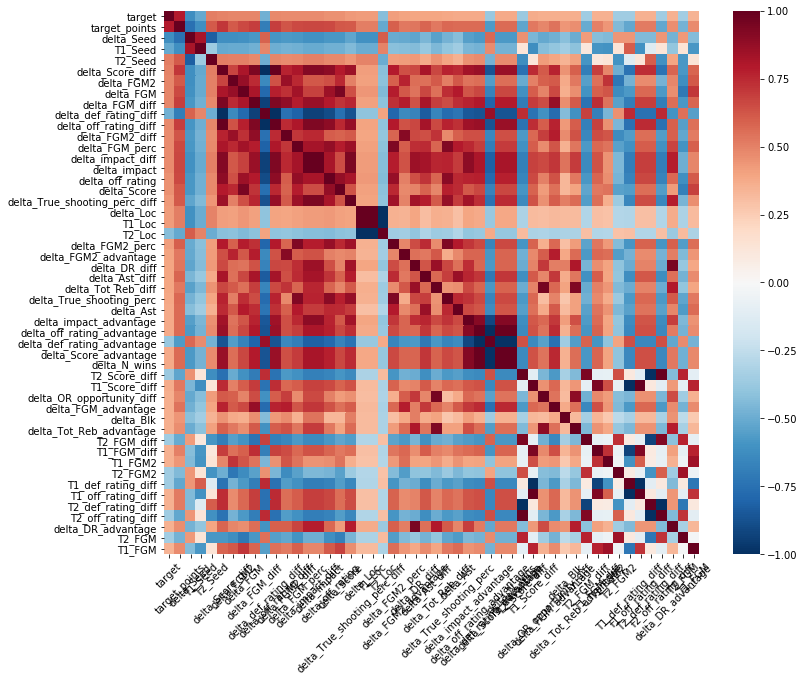

In [61]:
high_corr = exp.plot_correlations(df, target='target', limit=50)

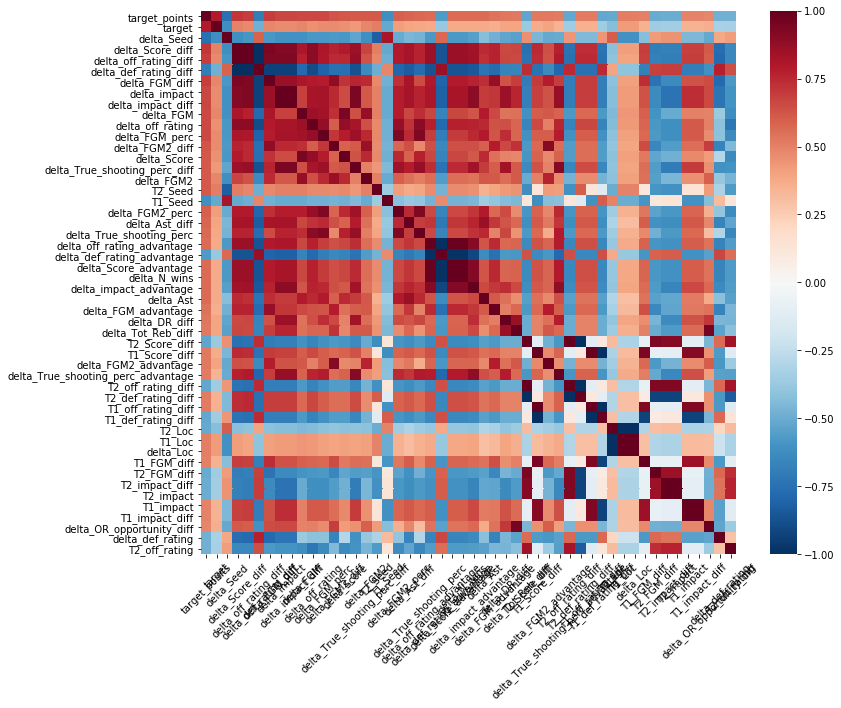

In [62]:
high_corr = exp.plot_correlations(df, target='target_points', limit=50)

                               delta_Seed  delta_Score_diff  \
delta_Seed                       1.000000         -0.616475   
delta_Score_diff                -0.616475          1.000000   
delta_off_rating_diff           -0.592136          0.994604   
delta_def_rating_diff            0.592136         -0.994604   
delta_FGM_diff                  -0.581331          0.943205   
delta_impact                    -0.609088          0.919468   
delta_impact_diff               -0.609088          0.919468   
delta_FGM                       -0.607557          0.815403   
delta_off_rating                -0.580273          0.894058   
delta_FGM_perc                  -0.579694          0.818907   
delta_FGM2_diff                 -0.576923          0.768833   
delta_Score                     -0.581901          0.792838   
delta_True_shooting_perc_diff   -0.530140          0.854711   
delta_FGM2                      -0.614461          0.677553   
T2_Seed                         -0.825286          0.50

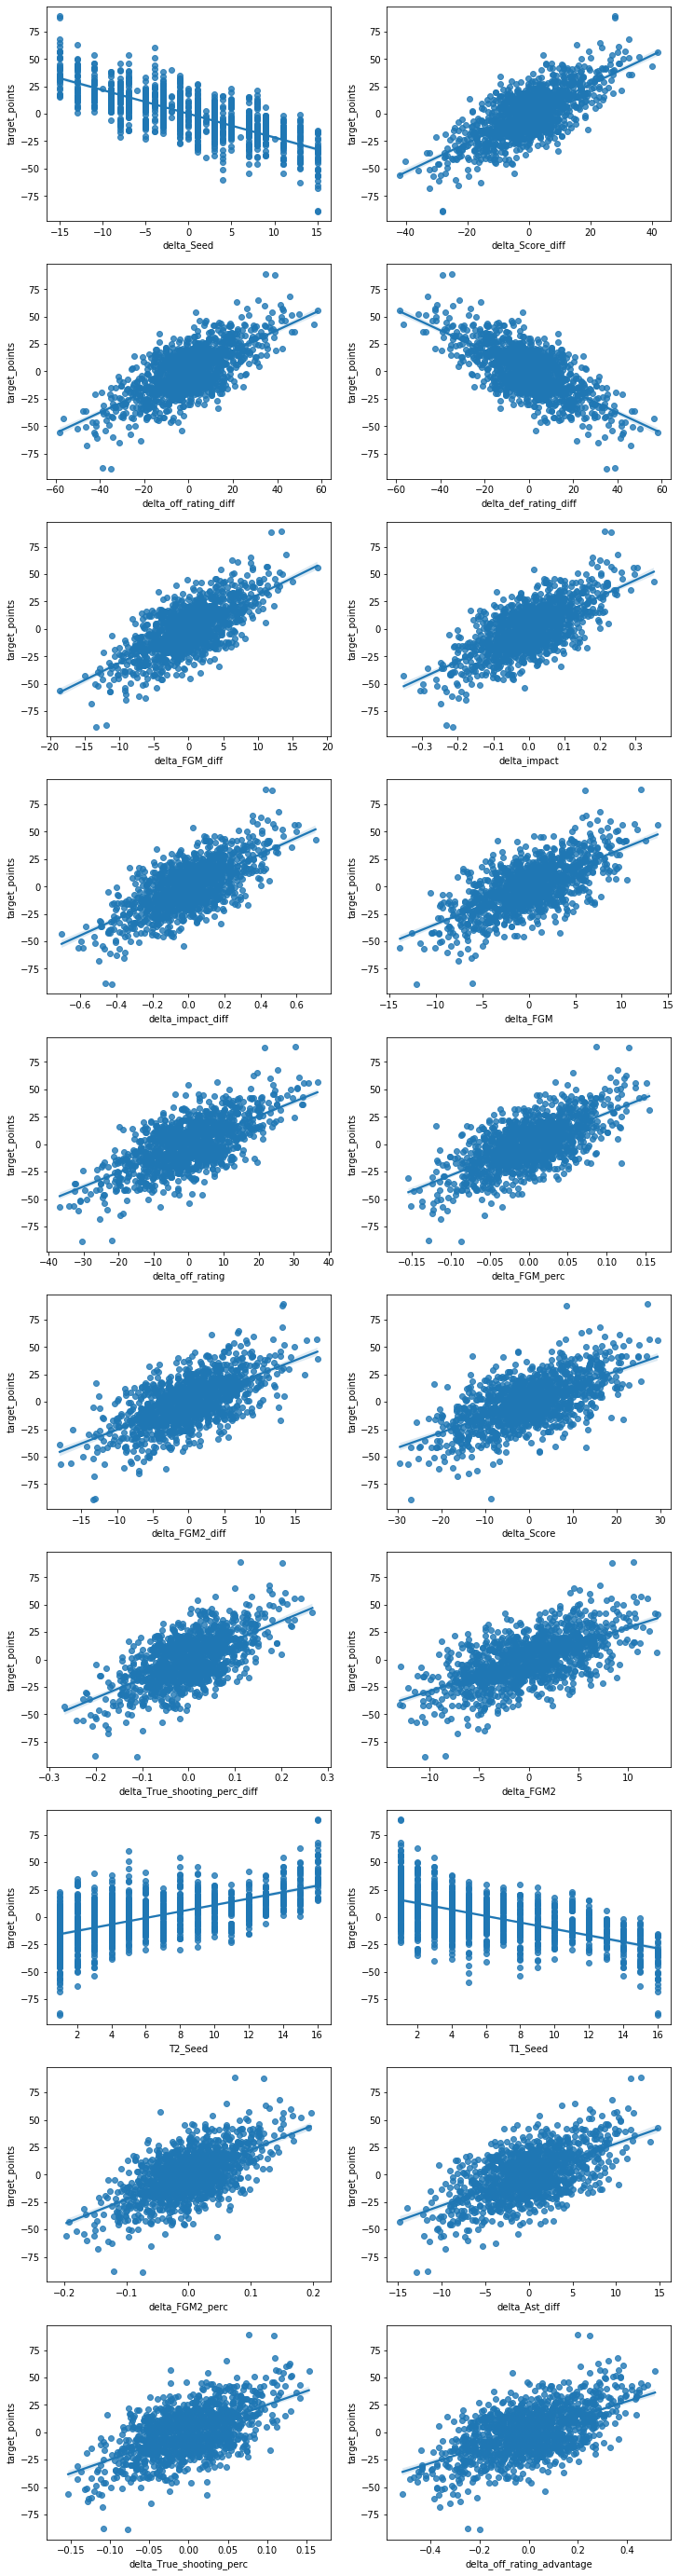

In [63]:
exp.corr_target(df, 'target_points', list(high_corr[2:22].index), x_estimator=None)

In [64]:
for col in [col for col in df if 'delta' in col]:
    df[f'sign_{col}'] = np.sign(df[col])

In [65]:
feats = []
scores = []

for col in [col for col in df if 'sign_' in col]:
    try:
        scores.append(df.groupby(col)['target'].mean()[1])
        feats.append(col)
    except KeyError:
        continue

segments = pd.DataFrame({'feat': feats, 'score': scores})
                      
segments.sort_values(by='score', ascending=False)

feat     score
0                    sign_delta_Loc  0.851064
24                  sign_delta_FGM2  0.719048
26             sign_delta_FGM2_diff  0.714968
23                   sign_delta_FGM  0.708134
89              sign_delta_FGM_perc  0.700000
..                              ...       ...
51               sign_delta_PF_diff  0.387917
69            sign_delta_def_rating  0.373016
70  sign_delta_def_rating_advantage  0.370787
71       sign_delta_def_rating_diff  0.317460
97                  sign_delta_Seed  0.214286

[100 rows x 2 columns]